In [1]:
import keras
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import load_img,img_to_array
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping,History
from keras.preprocessing.image import load_img
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Using Theano backend.


In [2]:
data = pd.read_csv("driving_log.csv")
data.head()

center  \
0  IMG/center_2016_12_01_13_30_48_287.jpg   
1  IMG/center_2016_12_01_13_30_48_404.jpg   
2  IMG/center_2016_12_01_13_31_12_937.jpg   
3  IMG/center_2016_12_01_13_31_13_037.jpg   
4  IMG/center_2016_12_01_13_31_13_177.jpg   

                                    left  \
0   IMG/left_2016_12_01_13_30_48_287.jpg   
1   IMG/left_2016_12_01_13_30_48_404.jpg   
2   IMG/left_2016_12_01_13_31_12_937.jpg   
3   IMG/left_2016_12_01_13_31_13_037.jpg   
4   IMG/left_2016_12_01_13_31_13_177.jpg   

                                    right  steering  throttle  brake  \
0   IMG/right_2016_12_01_13_30_48_287.jpg       0.0       0.0    0.0   
1   IMG/right_2016_12_01_13_30_48_404.jpg       0.0       0.0    0.0   
2   IMG/right_2016_12_01_13_31_12_937.jpg       0.0       0.0    0.0   
3   IMG/right_2016_12_01_13_31_13_037.jpg       0.0       0.0    0.0   
4   IMG/right_2016_12_01_13_31_13_177.jpg       0.0       0.0    0.0   

       speed  
0  22.148290  
1  21.879630  
2   1.453011  
3   1.438419  
4   1.418236

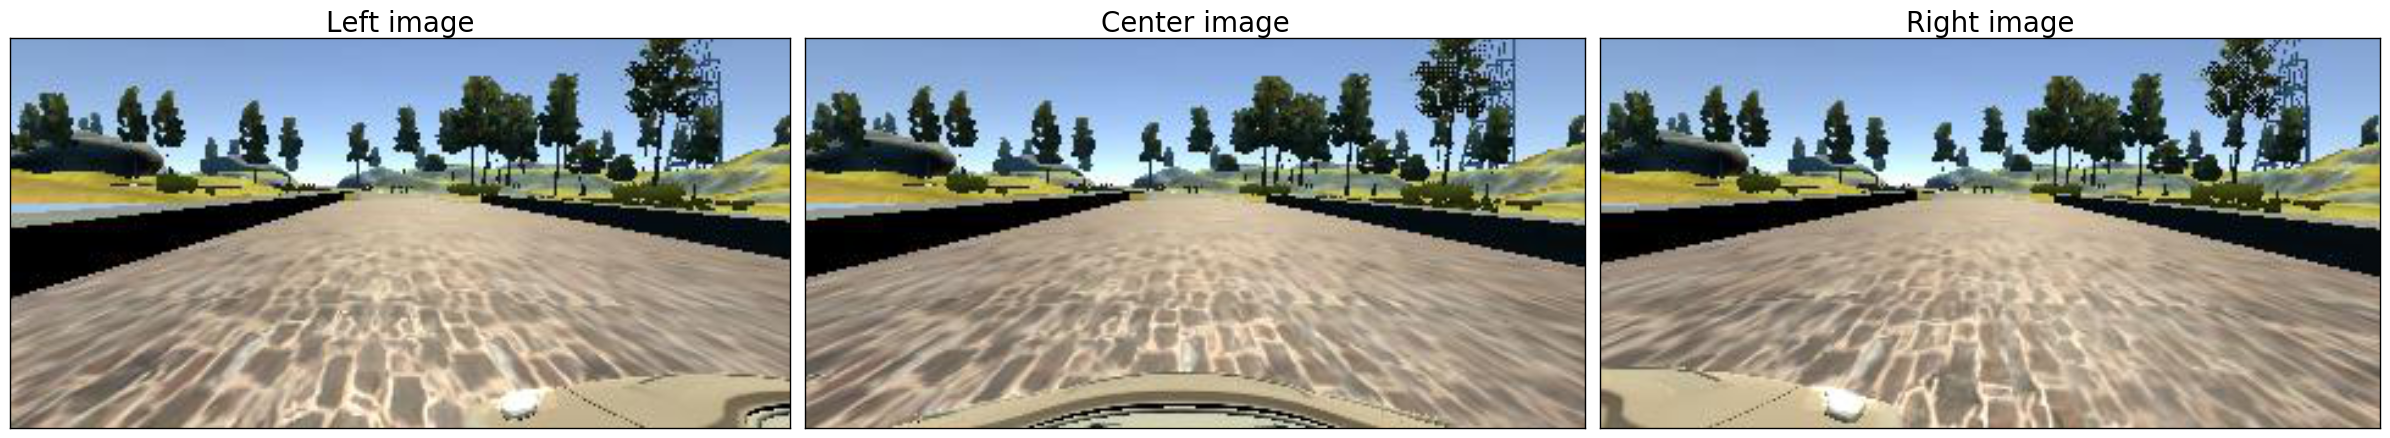

In [3]:
img_left=load_img('IMG/left_2016_12_01_13_30_48_287.jpg')
img_center=load_img('IMG/center_2016_12_01_13_30_48_287.jpg')
img_right=load_img('IMG/right_2016_12_01_13_30_48_287.jpg')
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(24,8))
ax1.imshow(img_left)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("Left image",fontsize=20)
ax2.imshow(img_center)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("Center image",fontsize=20)
ax3.imshow(img_right)
ax3.set_xticks([]);ax3.set_yticks([])
ax3.set_title("Right image",fontsize=20)
f.tight_layout()


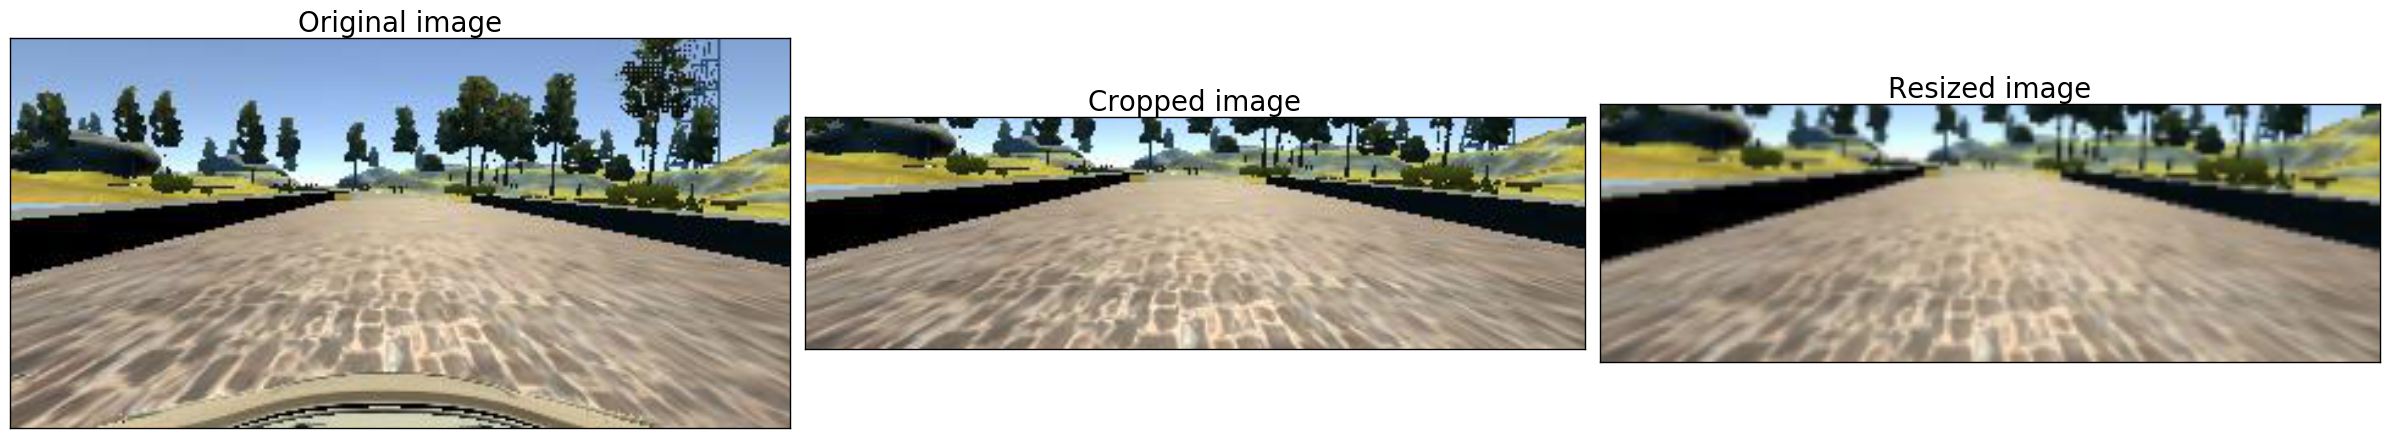

In [4]:
img=load_img('IMG/center_2016_12_01_13_30_48_287.jpg')
img = np.array(img)
cropped_img = img[40:img.shape[0]-25,:]
resized = cv2.resize(cropped_img,(200,66), interpolation=cv2.INTER_AREA)
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,8))
ax1.imshow(img)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("Original image",fontsize=20)
ax2.imshow(cropped_img)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("Cropped image",fontsize=20)
ax3.imshow(resized)
ax3.set_xticks([]);ax3.set_yticks([])
ax3.set_title("Resized image",fontsize=20)
f.tight_layout()

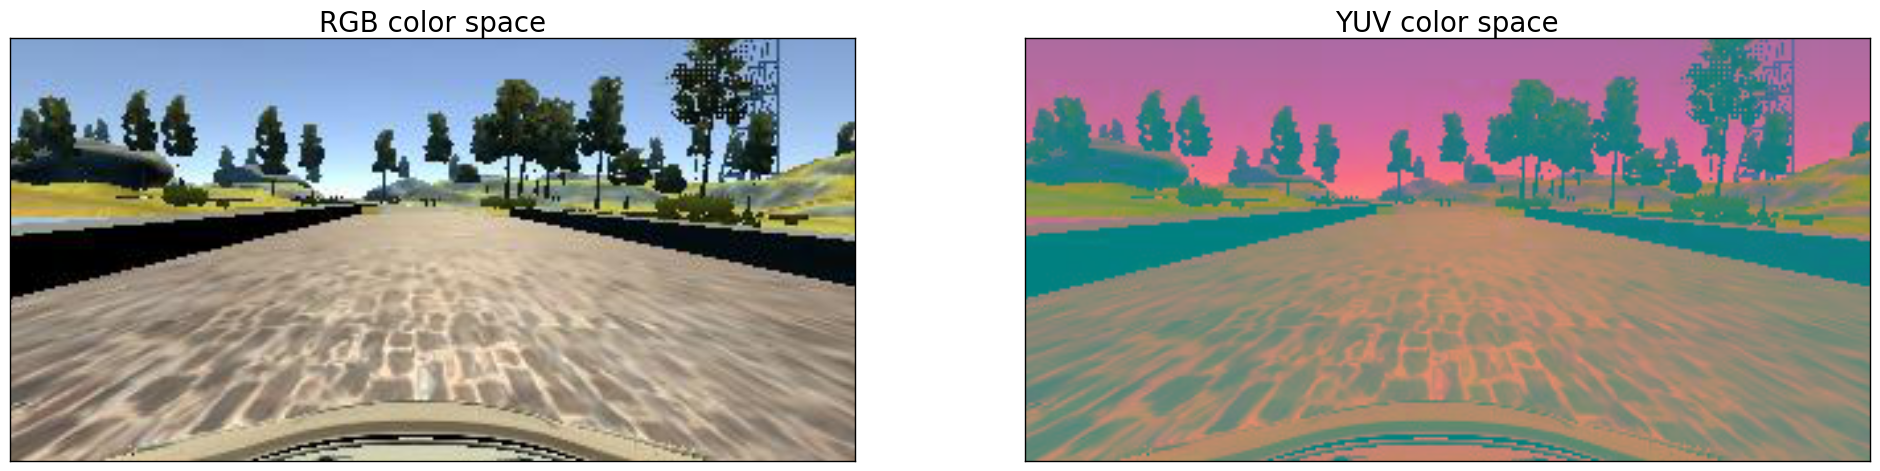

In [5]:
img=load_img('IMG/center_2016_12_01_13_30_48_287.jpg')
img_yuv = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2YUV)
f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,8)) 
ax1.imshow(img)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("RGB color space",fontsize=20)
ax2.imshow(img_yuv)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("YUV color space",fontsize=20)

In [6]:
def augment_brightness(img):
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2HSV)
    random_bright = 0.25+np.random.uniform()
    img[:,:,2] = img[:,:,2]*random_bright
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img,random_bright

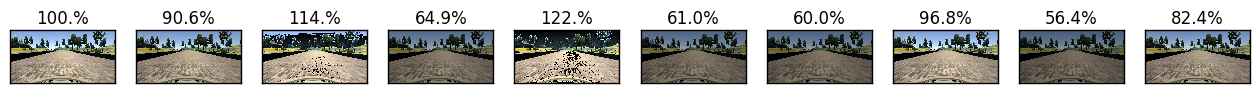

In [7]:
img=load_img('IMG/center_2016_12_01_13_30_48_287.jpg')
fig = plt.figure(figsize=(16,10))
for i in range(10):
    bright_img, bright = augment_brightness(img)
    subplot = fig.add_subplot(10,10,(i+1))
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(bright_img,interpolation="nearest")
    subplot.set_title(str(bright*100)[:4]+"%")


In [8]:
def transpose_image(img,steering):
    img = cv2.flip(img,1)
    return img,-1.0*steering



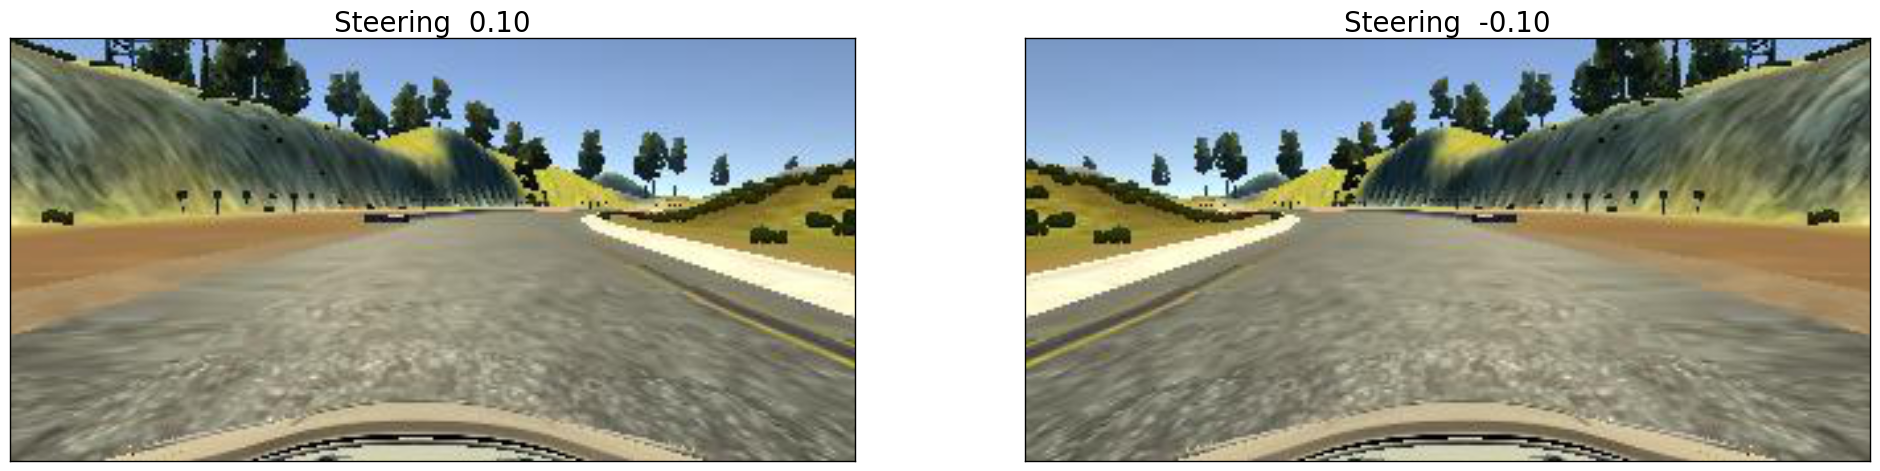

In [9]:
original = data.loc[1430]
steering = original["steering"]
original_img = load_img(original["center"])
original_img = np.array(original_img)
flipped,flipped_steering = transpose_image(original_img,steering)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(24,8))
ax1.imshow(original_img)
ax1.set_xticks([]);ax1.set_yticks([])
ax1.set_title("Steering  "+str(steering)[:4],fontsize=20)
ax2.imshow(flipped)
ax2.set_xticks([]);ax2.set_yticks([])
ax2.set_title("Steering  "+str(flipped_steering)[:5],fontsize=20)